# Applying adaptive thresholding (cam)

In [3]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    #roi = frame[0:500, 0:500]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray, (13, 13), 0)
    thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 1)
    cv2.imshow('frame',frame)
    cv2.imshow('gray',gray)
    cv2.imshow('gray_blur',gray_blur)
    cv2.imshow('thresh',thresh)
    if cv2.waitKey(2) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()


# Morphology (cam)

In [1]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    #roi = frame[0:500, 0:500]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
    thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 1)
    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)
    cv2.imshow('frame',frame)
    #cv2.imshow('gray',gray)
    #cv2.imshow('gray_blur',gray_blur)
    #cv2.imshow('thresh',thresh)
    cv2.imshow('closing',closing)
    if cv2.waitKey(2) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

# Contour detection and filtering (cam)

In [3]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    roi = frame[0:500, 0:500]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
    thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 1)
    kernel = np.ones((1, 1), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)
    cont_img = closing.copy()
    contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < 3000 or area > 5000:
            continue
        if len(cnt) < 5:
            continue
        ellipse = cv2.fitEllipse(cnt)
        cv2.ellipse(roi, ellipse, (0,255,0), 2)
    
    cv2.imshow('frame',frame)
    #cv2.imshow('gray',gray)
    #cv2.imshow('gray_blur',gray_blur)
    #cv2.imshow('thresh',thresh)
    cv2.imshow('closing',closing)
    cv2.imshow('final result', roi)
    if cv2.waitKey(2) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

# ![cv2](https://user-images.githubusercontent.com/49486323/95998441-d1dccf80-0e6f-11eb-983e-ba31fd68217a.png)


# Contour detection and filtering (img)

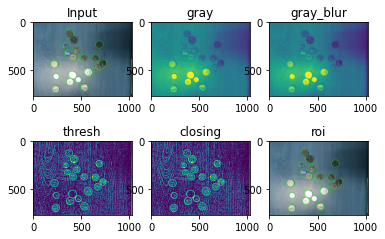

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('sIMG_8256.jpg')
#cap = cv2.VideoCapture(1)

#while True:
#ret, frame = img.read()
rows,cols,ch = img.shape
roi = img[0:rows, 0:cols]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 1)
kernel = np.ones((1, 1), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)
cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 1003 or area > 9689:
        continue
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(roi, ellipse, (0,255,0), 2)    

cv2.imshow('img',img)
cv2.imshow('gray',gray)
cv2.imshow('gray_blur',gray_blur)
cv2.imshow('thresh',thresh)
cv2.imshow('closing',closing)
cv2.imshow('final result', roi)
plt.subplot(231),plt.imshow(img),plt.title('Input')
plt.subplot(232),plt.imshow(gray),plt.title('gray')
plt.subplot(233),plt.imshow(gray_blur),plt.title('gray_blur')
plt.subplot(234),plt.imshow(thresh),plt.title('thresh')
plt.subplot(235),plt.imshow(closing),plt.title('closing')
plt.subplot(236),plt.imshow(roi),plt.title('roi')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.show()

# Trackbar

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def nothing(x):
    pass
cv2.namedWindow('img')
img = cv2.imread('sIMG_8256.jpg')
#cap = cv2.VideoCapture(1)
cv2.createTrackbar('s1','img',5000,30000,nothing)
cv2.createTrackbar('s2','img',6000,30000,nothing)

#while True:
#ret, frame = img.read()
while(1):
    img = cv2.imread('sIMG_8256.jpg')
    rows,cols,ch = img.shape
    s1 = cv2.getTrackbarPos('s1','img')
    s2 = cv2.getTrackbarPos('s2','img')
    roi = img[0:rows, 0:cols]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
    thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 1)
    kernel = np.ones((1, 1), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)
    cont_img = closing.copy()
    contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < s1 or area > s2:
            continue
        if len(cnt) < 5:
            continue
        ellipse = cv2.fitEllipse(cnt)
        cv2.ellipse(roi, ellipse, (0,255,0), 3)    

    cv2.imshow('img',img)
    #cv2.imshow('gray',gray)
    #cv2.imshow('gray_blur',gray_blur)
    cv2.imshow('thresh',thresh)
    cv2.imshow('closing',closing)
    cv2.imshow('final result', roi)
    #plt.subplot(231),plt.imshow(img),plt.title('Input')
    #plt.subplot(232),plt.imshow(gray),plt.title('gray')
    #plt.subplot(233),plt.imshow(gray_blur),plt.title('gray_blur')
    #plt.subplot(234),plt.imshow(thresh),plt.title('thresh')
    #plt.subplot(235),plt.imshow(closing),plt.title('closing')
    #plt.subplot(236),plt.imshow(roi),plt.title('roi')
    #plt.show()
    k = cv2.waitKey(40) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
#plt.show()

# ![home3](https://user-images.githubusercontent.com/49486323/96399210-c63f2f00-1208-11eb-9441-a327acd8d7fe.png)